Fichier ouvert : e:\EXOS ANALYSE DONNEES S1\SEANCE 6\island-index.csv
Taille de l'échantillon isolé (somme) : 299



C:\Users\stell\AppData\Local\Temp\ipykernel_17876\2382070009.py:37: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(chemin)


,count,freq,IC95_lower,IC95_upper
modalite,,,,
Type,1,0.0033,0.0000,0.0100
Trait de côte (km),105,0.3512,0.2977,0.4047
Surface (km²),181,0.6054,0.5485,0.6589
Longitude,12,0.0401,0.0201,0.0635


,count,freq,IC95_lower,IC95_upper,freq_global
modalite,,,,,
Type,1,0.0033,0.0000,0.0100,0.0033
Trait de côte (km),105,0.3512,0.2977,0.4047,0.3512
Surface (km²),181,0.6054,0.5485,0.6589,0.6054
Longitude,12,0.0401,0.0201,0.0635,0.0401


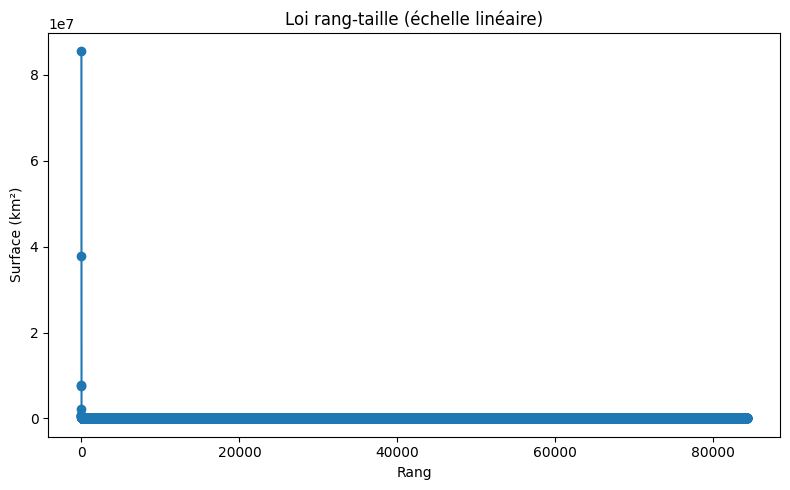

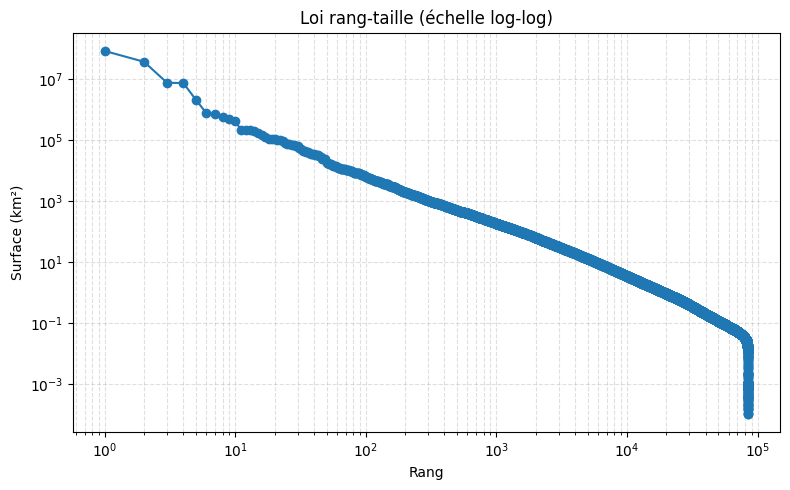

Spearman: SignificanceResult(statistic=np.float64(0.3677402126592111), pvalue=np.float64(1.2319405943269483e-07))
Kendall: SignificanceResult(statistic=np.float64(0.26703674332540317), pvalue=np.float64(2.9620692207577334e-08))


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from typing import List
import scipy.stats as stats
import math

# Question 2 :#
def _clean_number_series(s):
    """Nettoie une série en supprimant les caractères non-numériques et convertit en float.
    Utilise pd.to_numeric avec errors='coerce' pour convertir proprement et transformer les
    valeurs non-convertibles en NaN (float), évitant les erreurs liées à pd.NA.
    """
    # convertir en chaîne puis supprimer les caractères non numériques (sauf '.' et '-')
    s_str = s.astype(str).str.replace(r'[^\d\.\-]', '', regex=True)
    # remplacer les chaînes vides par NA puis convertir en numérique en forçant les erreurs en NaN
    s_str = s_str.replace('', pd.NA)
    return pd.to_numeric(s_str, errors='coerce')

# chemins candidats
candidates = [
    r"e:\EXOS ANALYSE DONNEES S1\SEANCE 6\island-index.csv",
    r"e:\EXOS ANALYSE DONNEES S1\island-index.csv",
    "island-index.csv"
]
chemin = None
for p in candidates:
    if os.path.exists(p):
        chemin = p
        break
if chemin is None:
    raise FileNotFoundError("Fichier 'island-index.csv' introuvable; adaptez le chemin dans la cellule.")

# charger le fichier CSV dans df
df = pd.read_csv(chemin)

# récupérer la première ligne du DataFrame et la nettoyer / forcer en numérique
first_row = df.iloc[0]
cleaned = _clean_number_series(first_row)

# ne garder que les valeurs non-nulles (colonnes numériques)
cleaned = cleaned.dropna()
modalites = cleaned.index.tolist()
counts = cleaned.astype(int).tolist()

# Filtrer les modalités et counts pour ne garder que les effectifs >= 0
modalites_pos = []
counts_pos = []
for m, c in zip(modalites, counts):
    if c >= 0:
        modalites_pos.append(m)
        counts_pos.append(c)

# somme / taille de l'échantillon
n = sum(counts_pos)

if n == 0:
    raise ValueError("La somme des effectifs de la première ligne est nulle.")

# fréquences
freqs = [c / n for c in counts_pos]
lower = [round(x, 4) for x in [stats.binom.ppf(0.025, n, p/n) / n if p > 0 else 0 for p in counts_pos]]
upper = [round(x, 4) for x in [stats.binom.ppf(0.975, n, p/n) / n if p > 0 else 0 for p in counts_pos]]

# présenter les résultats dans un DataFrame
result = pd.DataFrame({
    "modalite": modalites_pos,
    "count": counts_pos,
    "freq": [round(p, 4) for p in freqs],
    "IC95_lower": lower,
    "IC95_upper": upper
})
result = result.set_index("modalite")
print(f"Fichier ouvert : {chemin}")
print(f"Taille de l'échantillon isolé (somme) : {n}\n")
display(result)

# Définir les fréquences globales pour la comparaison
frequences = freqs

# comparaison rapide (optionnel) : si vous avez une variable 'frequences' (fréquences globales)
if 'frequences' in globals():
    try:
        comp = result.copy()
        comp["freq_global"] = [round(x, 4) for x in frequences]
        display(comp)
    except Exception as e:
        print(f"Erreur lors de la comparaison : {e}")
else:
    print("Variable 'frequences' introuvable : comparaison globale non effectuée.")

def ordreDecroissant(values: List[float]) -> List[float]:
    """Retourne la liste triée en ordre décroissant."""
    return sorted(values, reverse=True)

def conversionLog(ax):
    """Convertit les axes d'une figure en échelle logarithmique (base 10)."""
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(True, which='both', ls='--', alpha=0.4)

# Question 3 #
colname = "Surface (km²)"
if colname not in df.columns:
    print("Colonnes disponibles :", df.columns.tolist())
    raise KeyError(f"Colonne attendue '{colname}' introuvable. Adapter le nom ou vérifier le CSV.")
# Isoler la colonne et forcer en float
surface_series = df[colname].dropna()
surface_clean = _clean_number_series(surface_series)
continents_add = [
    85545323.0,   # Asie/Afrique/Europe
    37856841.0,   # Amérique
    7768030.0,    # Antarctique
    7605049.0     # Australie
]
surface_list = surface_clean.tolist() + continents_add

# Question 4 Ordonner en décroissant
surface_tri = ordreDecroissant(surface_list)

# Question 5 Visualiser la loi rang-taille
rangs = np.arange(1, len(surface_tri) + 1)
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(rangs, surface_tri, marker='o', linestyle='-')
ax.set_xlabel("Rang")
ax.set_ylabel("Surface (km²)")
ax.set_title("Loi rang-taille (échelle linéaire)")
plt.tight_layout()
out_lin = r"e:\EXOS ANALYSE DONNEES S1\SEANCE 5\rang_taille_lin.png"
plt.savefig(out_lin, dpi=200)
plt.show()

# Question 6 Conversion en logarithme et sauvegarde
fig2, ax2 = plt.subplots(figsize=(8,5))
ax2.plot(rangs, surface_tri, marker='o', linestyle='-')
ax2.set_xlabel("Rang")
ax2.set_ylabel("Surface (km²)")
ax2.set_title("Loi rang-taille (échelle log-log)")
conversionLog(ax2)
plt.tight_layout()
out_log = r"e:\EXOS ANALYSE DONNEES S1\SEANCE 5\rang_taille_log.png"
plt.savefig(out_log, dpi=200)
plt.show()

# Question 8 :

# fonctions demandées
def ordrePopulation(values, states):
    """
    values: iterable of numeric-like (strings allowed)
    states: iterable of state names (same length)
    retourne une liste de tuples (state, float(value)) triée par valeur décroissante
    """
    vals = []
    for v in values:
        # Handle NaN/NA values first
        if pd.isna(v):
            val = float('nan')
        elif isinstance(v, (int, float, np.floating, np.integer)):
            val = float(v)
        else:
            cleaned = _clean_number_series(pd.Series([v])).iloc[0]
            if pd.isna(cleaned):
                val = float('nan')
            else:
                val = float(cleaned)
        vals.append(val)
    
    paired = list(zip(states, vals))
    paired_sorted = sorted(paired, key=lambda x: (pd.isna(x[1]), x[1]), reverse=True)
    return paired_sorted

def classementPays(classement_a, classement_b):
    """
    classement_a, classement_b: listes de (state, value) (p.ex. résultats de ordrePopulation)
    retourne liste de tuples (state, rank_a, rank_b) triée par rank_a (1 = premier)
    """
    rank_a = {state: i+1 for i, (state, _) in enumerate(classement_a)}
    rank_b = {state: i+1 for i, (state, _) in enumerate(classement_b)}
    states = list({s for s, _ in classement_a} | {s for s, _ in classement_b})
    combined = [(s, rank_a.get(s, len(rank_a)+1), rank_b.get(s, len(rank_b)+1)) for s in states]
    combined.sort(key=lambda x: x[1])  # ordonner par classement de 2007
    return combined

# --- Question 9 Chargement du fichier ---
chemin_data = r"e:\EXOS ANALYSE DONNEES S1\SEANCE 6\Le-Monde-HS-Etats-du-monde-2007-2025.csv"

# Charger le fichier dans df_data
loader = globals().get('ouvrirUnFichier', None)
if callable(loader):
    try:
        df_data = loader(chemin_data)
    except Exception as e:
        # si erreur lors de l'ouverture via la fonction custom, la remonter avec plus d'infos
        raise RuntimeError(f"Erreur via ouvrirUnFichier pour {chemin_data}: {e}") from e
else:
    try:
        df_data = pd.read_csv(chemin_data)
    except Exception as e:
        # si erreur lors de l'ouverture avec pandas, la remonter avec plus d'infos
        raise RuntimeError(f"Impossible d'ouvrir le fichier {chemin_data} avec pandas.read_csv: {e}") from e

# Question 10 : colonnes à isoler #
cols = ["État", "Pop 2007", "Pop 2025", "Densité 2007", "Densité 2025"]
for c in cols:
    if c not in df_data.columns:
        raise KeyError(f"Colonne attendue introuvable: {c}. Colonnes disponibles: {df_data.columns.tolist()}")

states = df_data["État"].astype(str).tolist()
pop2007 = df_data["Pop 2007"].tolist()
pop2025 = df_data["Pop 2025"].tolist()
dens2007 = df_data["Densité 2007"].tolist()
dens2025 = df_data["Densité 2025"].tolist()

# Question 11 tri décroissant
classement_pop2007 = ordrePopulation(pop2007, states)
classement_pop2025 = ordrePopulation(pop2025, states)
classement_dens2007 = ordrePopulation(dens2007, states)
classement_dens2025 = ordrePopulation(dens2025, states)

# Question 12 préparation comparaison (classer par classement pop2007)
comp_pop_vs_dens = classementPays(classement_pop2007, classement_dens2007)

# Question 13 isoler deux colonnes sous forme de listes (rangs)
ranks_pop = []
ranks_dens = []
for state, rpop, rdens in comp_pop_vs_dens:
    ranks_pop.append(rpop)
    ranks_dens.append(rdens)

# Question 14 corrélations de rangs
spearman_res = stats.spearmanr(ranks_pop, ranks_dens)
kendall_res = stats.kendalltau(ranks_pop, ranks_dens)

print("Spearman:", spearman_res)
print("Kendall:", kendall_res)